## **Moving_Average_and_Exponential_Smoothing Analysis**
This analysis applies moving average and exponential smoothing techniques to uncover underlying trends in time series data.

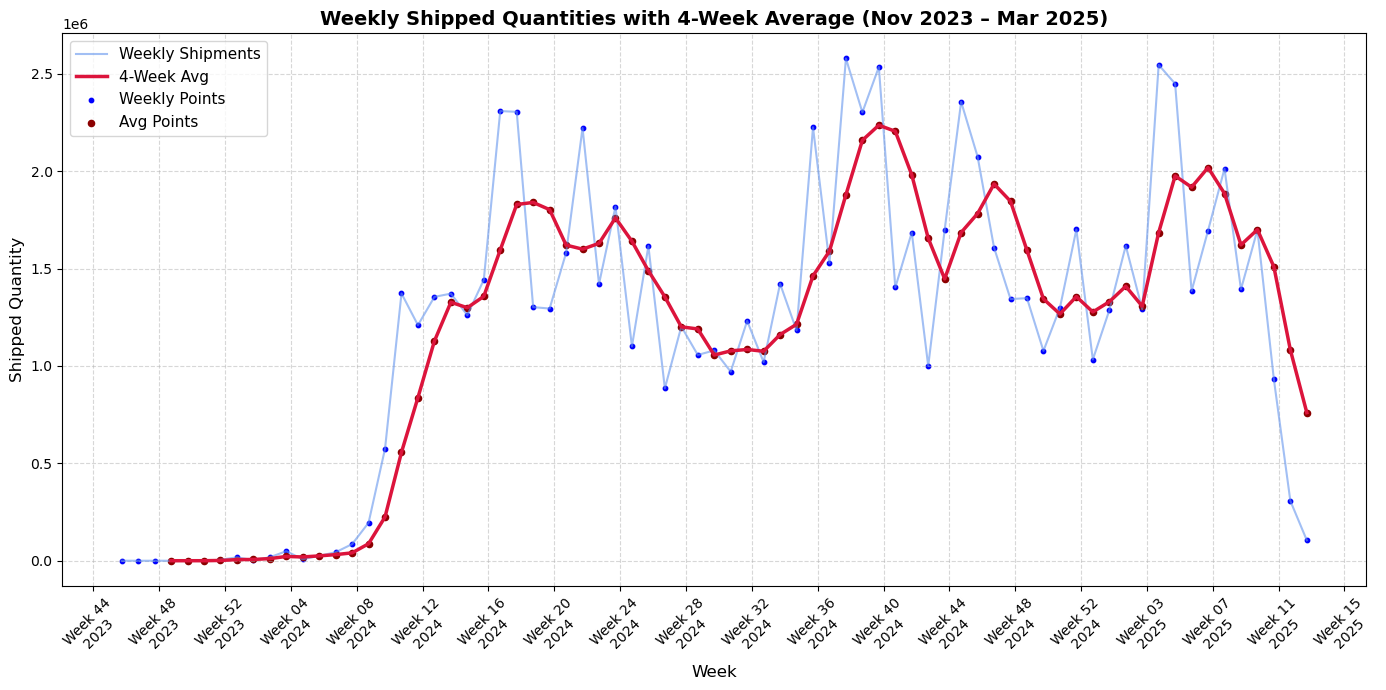

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Read the shipment data
file_path = r"C:\Users\balbi\OneDrive\CAPSTONE\ASU Forecast\ASU Forecast\Historical Demand (Shipments) Capstone Data(result).csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Step 2: Convert date column to datetime format
df['Customer_Required_Date_CRD'] = pd.to_datetime(df['Customer_Required_Date_CRD'], format="%m/%d/%Y")

# Step 3: Filter data for the period Nov 2023 to Mar 2025
start, end = "2023-11-01", "2025-03-31"
mask = (df['Customer_Required_Date_CRD'] >= start) & (df['Customer_Required_Date_CRD'] <= end)
df_filtered = df.loc[mask].sort_values('Customer_Required_Date_CRD')

# Step 4: Aggregate shipped quantities by week
weekly_summary = (
    df_filtered
    .set_index('Customer_Required_Date_CRD')
    .resample('W')
    .sum()
)

# Step 5: Calculate 4-week moving average
weekly_summary['Moving_Avg_4wk'] = weekly_summary['Shipped_Qty'].rolling(window=4).mean()

# Step 6: Plotting the data
fig, ax = plt.subplots(figsize=(14, 7))

# Plot weekly demand
ax.plot(weekly_summary.index, weekly_summary['Shipped_Qty'], label='Weekly Shipments',
        color='cornflowerblue', linewidth=1.5, alpha=0.6)

# Plot 4-week average
ax.plot(weekly_summary.index, weekly_summary['Moving_Avg_4wk'], label='4-Week Avg',
        color='crimson', linewidth=2.5)

# Customize the x-axis to show every 4th week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('Week %W\n%Y'))
plt.xticks(rotation=45)

# Add scatter points
ax.scatter(weekly_summary.index, weekly_summary['Shipped_Qty'], s=10, color='blue', label='Weekly Points')
ax.scatter(weekly_summary.index, weekly_summary['Moving_Avg_4wk'], s=20, color='darkred', label='Avg Points')

# Add labels and formatting
ax.set_title("Weekly Shipped Quantities with 4-Week Average (Nov 2023 – Mar 2025)", fontsize=14, fontweight='bold')
ax.set_xlabel("Week", fontsize=12)
ax.set_ylabel("Shipped Quantity", fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


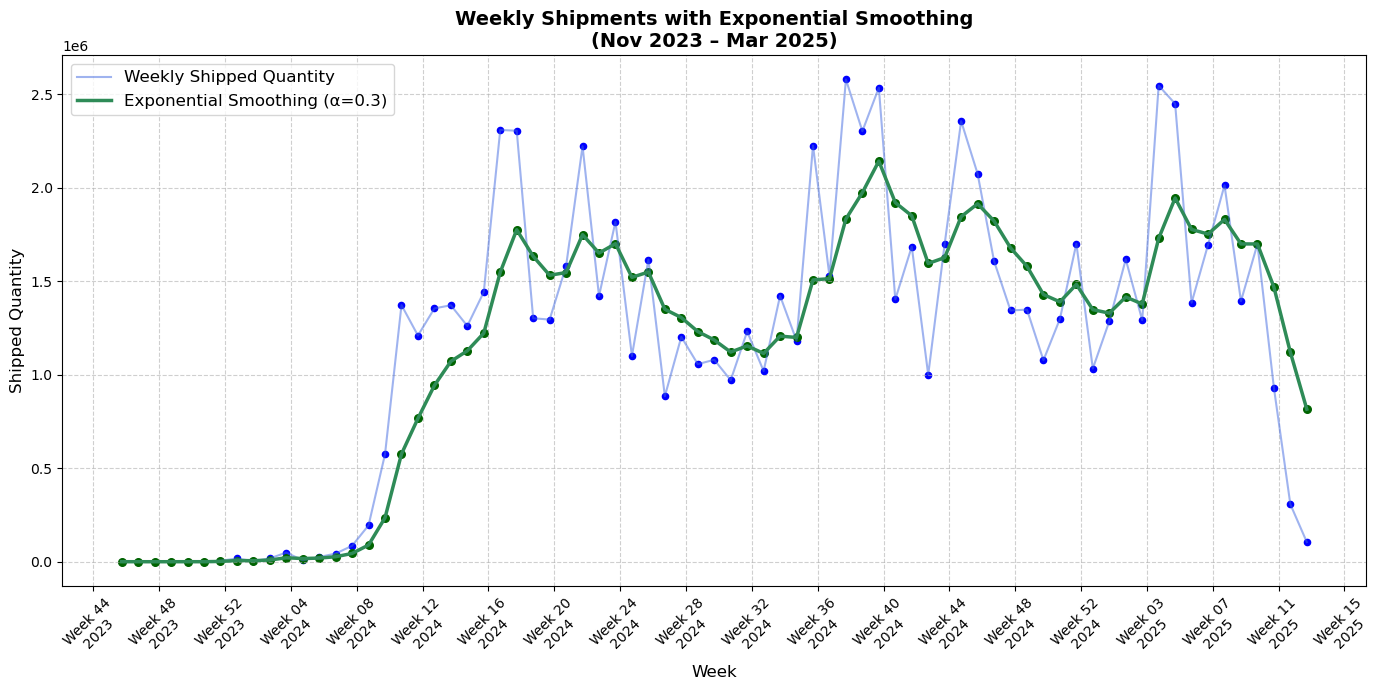

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Read the shipment dataset
file_path = r"C:\Users\balbi\OneDrive\CAPSTONE\ASU Forecast\ASU Forecast\Historical Demand (Shipments) Capstone Data(result).csv"  # Replace if needed
df = pd.read_csv(file_path)

# Step 2: Convert date column to datetime
df['Customer_Required_Date_CRD'] = pd.to_datetime(df['Customer_Required_Date_CRD'], format="%m/%d/%Y")

# Step 3: Focus on data from Nov 2023 to Mar 2025
date_start, date_end = "2023-11-01", "2025-03-31"
mask = (df['Customer_Required_Date_CRD'] >= date_start) & (df['Customer_Required_Date_CRD'] <= date_end)
filtered_df = df.loc[mask].sort_values('Customer_Required_Date_CRD')

# Step 4: Group data by week and sum shipped quantities
weekly_summary = (
    filtered_df
    .set_index('Customer_Required_Date_CRD')
    .resample('W')
    .sum()
)

# Step 5: Apply exponential smoothing with alpha = 0.3
alpha_value = 0.3
weekly_summary['Smoothed_Qty'] = weekly_summary['Shipped_Qty'].ewm(alpha=alpha_value, adjust=False).mean()

# Step 6: Create the line plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot original weekly shipment volumes
ax.plot(weekly_summary.index, weekly_summary['Shipped_Qty'],
        color='royalblue', linewidth=1.5, alpha=0.5, label='Weekly Shipped Quantity')

# Plot the smoothed line
ax.plot(weekly_summary.index, weekly_summary['Smoothed_Qty'],
        color='seagreen', linewidth=2.5, label=f'Exponential Smoothing (α={alpha_value})')

# Markers for emphasis
ax.scatter(weekly_summary.index, weekly_summary['Shipped_Qty'], s=20, color='blue')
ax.scatter(weekly_summary.index, weekly_summary['Smoothed_Qty'], s=30, color='darkgreen')

# Format the X-axis with readable weekly ticks
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('Week %W\n%Y'))
plt.xticks(rotation=45)

# Add titles and grid
ax.set_title("Weekly Shipments with Exponential Smoothing\n(Nov 2023 – Mar 2025)", fontsize=14, fontweight='bold')
ax.set_xlabel("Week", fontsize=12)
ax.set_ylabel("Shipped Quantity", fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

# Final plot rendering
plt.tight_layout()
plt.show()
